In [2]:
from sklearn import tree

X = [[0, 0], [1, 1]]
Y = [0, 1]
decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier = decision_tree_classifier.fit(X, Y)


In [3]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image  
import pydotplus 


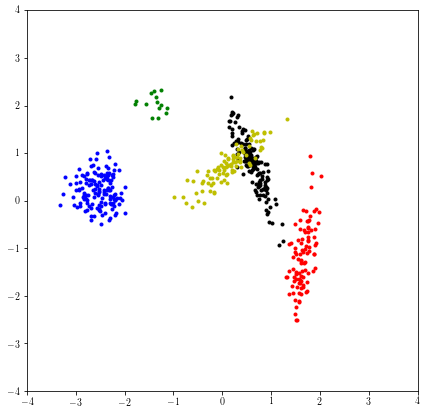

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Limits of the domain
Lim = 4

# Number of components
N = 5

# Generate random mixture parameters
w = np.random.rand(N)
w = w/np.sum(w)
mu = []
Sig = []

for i in range(N):
    mu.append(np.random.randn(2))
    A = np.random.randn(2,2)/3
    Sig.append(A.dot(A.T))
    
# Number of data points
T = N*100
# Number of points from each cluster center
Ts = np.random.multinomial(T, w)
X = []
C = []
for i in range(N):
    x = np.random.multivariate_normal(mu[i], Sig[i], Ts[i])
    c = np.ones(Ts[i])*i
    X.append(x)
    C.append(c)

XX = np.concatenate(X,axis=0)
CC = np.concatenate(C,axis=0)

from sklearn import tree

plt.figure(figsize=(7,7))
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

ax = plt.gca()
ax.set_xlim(-Lim,Lim)
ax.set_ylim(-Lim,Lim)

col = ['r','b','g','k','y','m']

for i in range(N):
    plt.plot(X[i][:,0],X[i][:,1],'.'+col[i%len(col)])

    
plt.show()

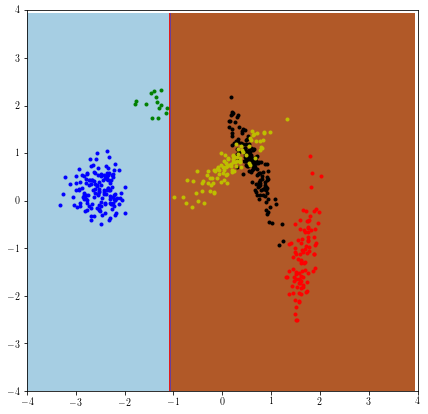

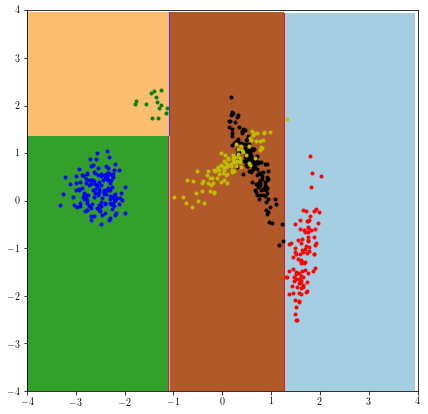

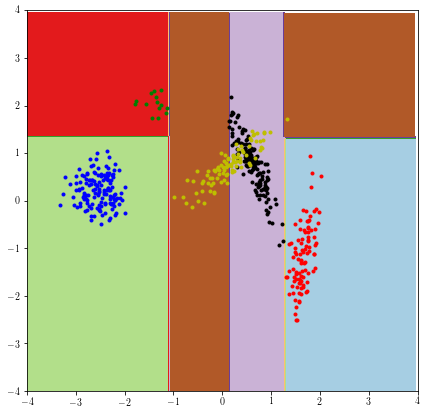

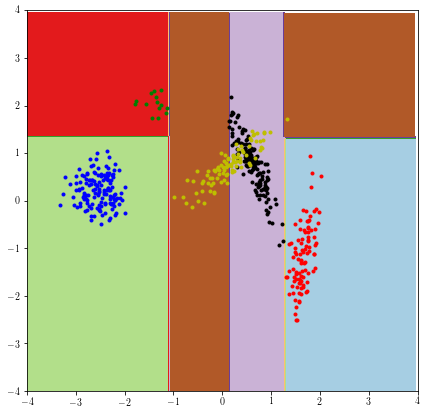

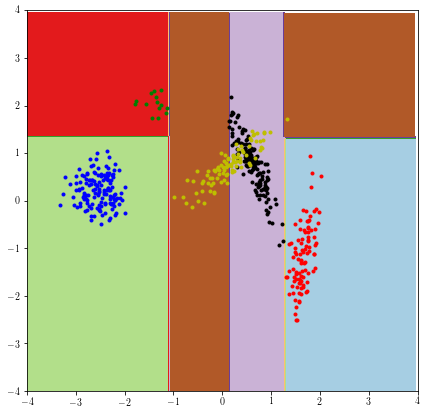

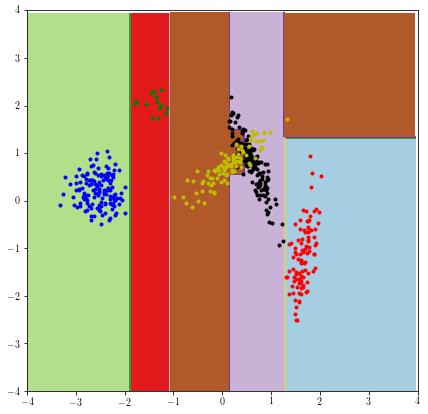

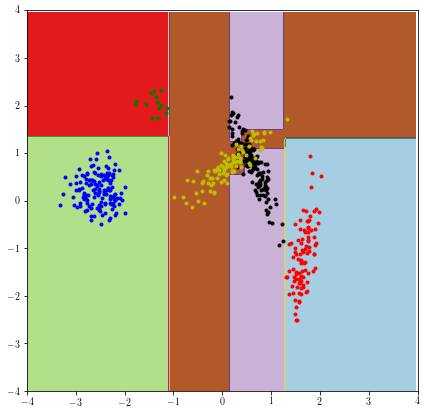

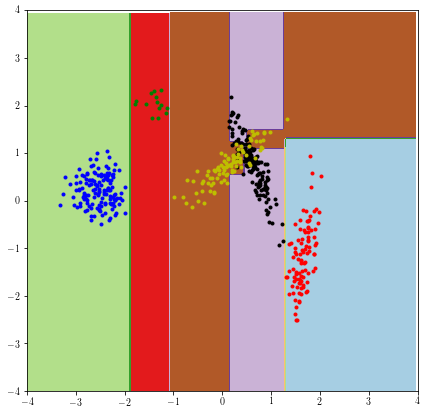

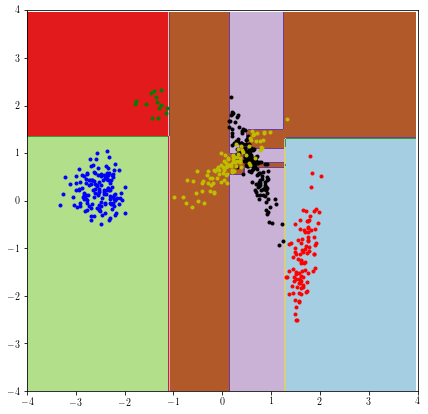

In [5]:
for depth in range(1,10):
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf = clf.fit(XX, CC)

    plot_step = 0.05
    plt.figure(figsize=(7,7))

    ax = plt.gca()
    ax.set_xlim(-Lim,Lim)
    ax.set_ylim(-Lim,Lim)

    x_min, x_max = -Lim, Lim
    y_min, y_max = -Lim, Lim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    col = ['r','b','g','k','y','m']

    for i in range(N):
        plt.plot(X[i][:,0],X[i][:,1],'.'+col[i%len(col)])


 

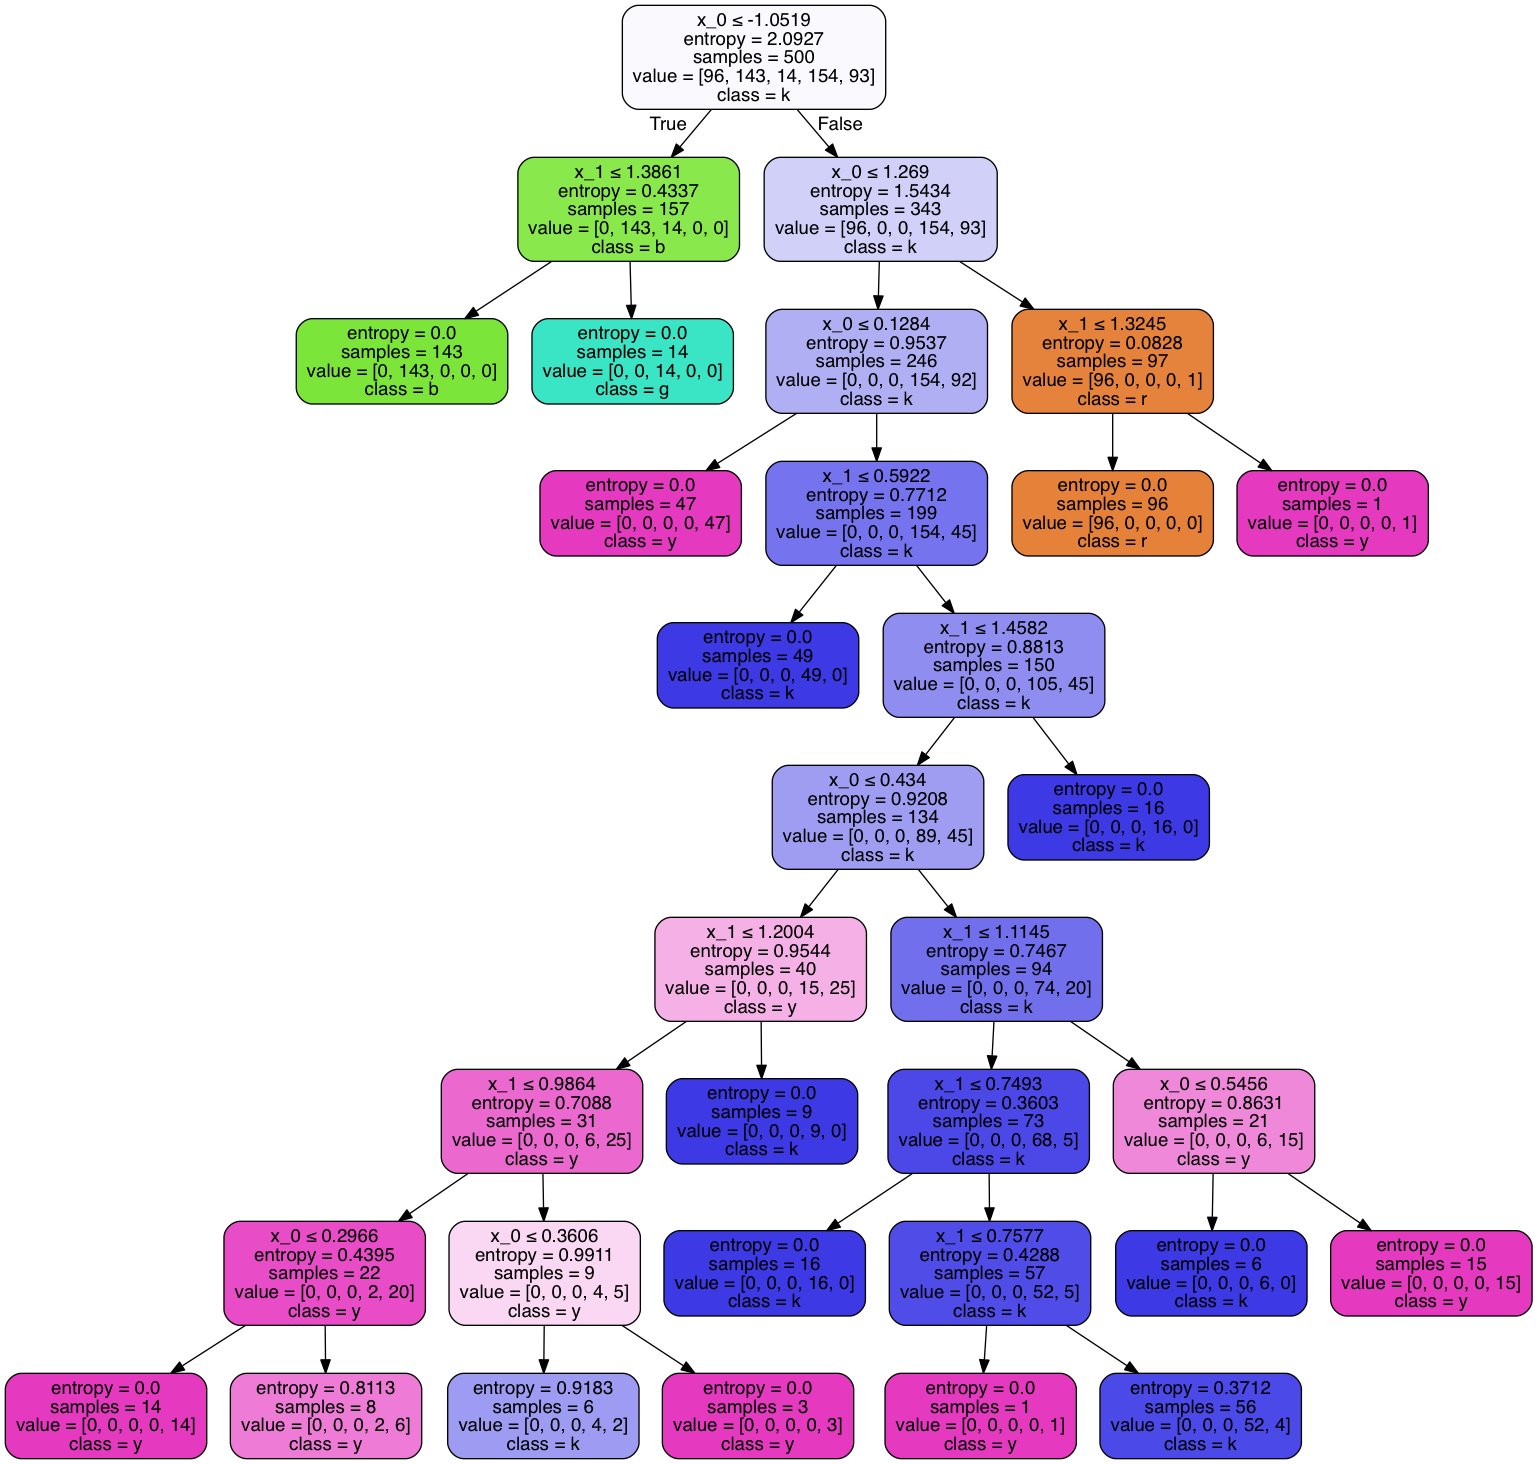

In [6]:
   

class_names = col[0:N]
feature_names = ['x_0','x_1']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

#plt.show()

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

def entropy(p):
    return -np.sum(np.log2(p)*p)

In [26]:
p = np.array([2.,1.])
p = p/np.sum(p)

entropy(p)*3./4

0.68872187554086717

In [27]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

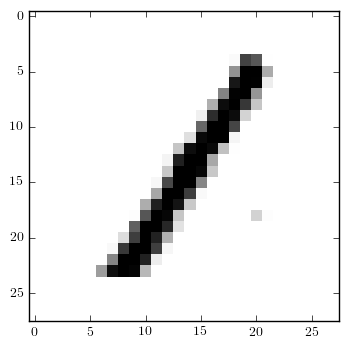

In [38]:
plt.imshow(mnist.data[10000].reshape(28,28),cmap='gray_r',interpolation='nearest')
plt.show()

# Question 3: Decision Trees

In this exercise we will investigate and compare two alternative measures for choosing a 
decision boundry and a feature in decision trees: (a) Gini impurity and (b) Information Gain. 

Suppose there are $C$ classes in a dataset with $N$ samples. The number of examples having class $c$ is
$N_c$ where $\sum_c N_c = N$. 

At each step, a decision tree algorithm tries multiple potential thresholds (remember that as the basic decision tree algorithm looks at a single feature at a time
we only need to consider midpoints) and selects the one that would lead to the "purest" partitions. We will measure 
the impurity by Entropy or the Gini impurity.


A given threshold $\tau$ subdivides the dataset into two partitions of sizes $L$ and $R$
according to a single feature $x$: $L$ data points with $x< \tau$ and $R$ data points with $x \geq \tau$ where $L + R = N$. The number of data points of class $c$ in each partition is $L_c$ and $R_c$. We have $L_1 + L_2 + \dots + L_C = L$ and $R_1 + R_2 + \dots + R_C = R$.

The Gini impurity is defined as:
$$G(p_{1:C}) = 1 - \Sigma_c p_c^2$$
where $p_i$ is the frequency of each class

The entropy, on the other hand is defined as 
$$H(p_{1:C}) =  - \Sigma_c p_c \log{p_c}$$
Note that $\log$ stands for the natural logarithm.

Compute the following indices

### Gini:
$$
U_G(\tau) = \frac{L}{N} G(L_{1:C}/L) + \frac{R}{N} G(R_{1:C}/R)
$$
### Entropy:
$$
U_H(\tau) = \frac{L}{N} H(L_{1:C}/L) + \frac{R}{N} H(R_{1:C}/R)
$$

### Information gain:
$$
I(\tau) = H(N_{1:C}/N) - U_H(\tau)
$$


Given a dataset write a program that plots the scatterplot any two features and computes each index.


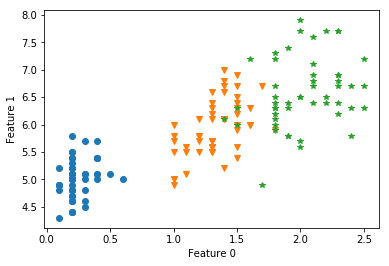

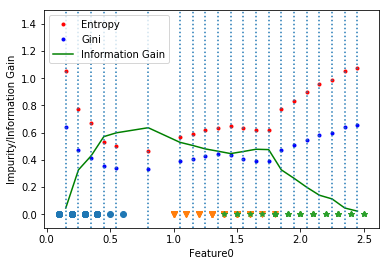

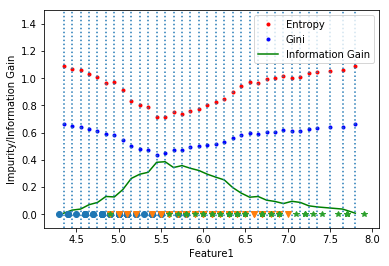

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

from sklearn.datasets import load_iris

dataset = load_iris()
X, c = dataset['data'][:,[3,0]], dataset['target']
M, N = X.shape

class_labels = np.unique(c)
num_of_labels = len(class_labels)

col = 'ov*'

for z in range(num_of_labels):
    ss = c == z
    plt.plot(X[ss,0], X[ss,1],col[z])
    
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()


for idx in range(N):
    ux = np.unique(X[:,idx])
    boundries = np.convolve(ux, np.array([0.5, 0.5]), mode='valid')

    G = np.zeros_like(boundries)
    H = np.zeros_like(boundries)
    IG = np.zeros_like(boundries)

    for i, tau in enumerate(boundries):    
        u, cnt = np.unique(c, return_counts=True)
        u_l, cnt_l = np.unique(c[X[:,idx]<=tau], return_counts=True)
        u_r, cnt_r = np.unique(c[X[:,idx]>tau], return_counts=True)

        #p_l = np.zeros(num_of_labels)
        #p_l[u_l] = cnt_l/np.sum(cnt_l)
        p_l = cnt_l/np.sum(cnt_l)
        w_l = np.sum(cnt_l)/np.sum(cnt)
    
        #p_r = np.zeros(num_of_labels)
        #p_r[u_r] = cnt_r/np.sum(cnt_r)
        p_r = cnt_r/np.sum(cnt_r)
        w_r = np.sum(cnt_r)/np.sum(cnt)

        p = cnt/np.sum(cnt)
        
        G[i] = w_l*(1 - np.sum(p_l**2) ) + w_r*(1 - np.sum(p_r**2) )
        H[i] = -w_l*np.sum(p_l*np.log(p_l)) - w_r*np.sum(p_r*np.log(p_r))
        IG[i] = -np.sum(p*np.log(p)) - (-w_l*np.sum(p_l*np.log(p_l)) - w_r*np.sum(p_r*np.log(p_r)))
        
        #print('L:', u_l, cnt_l)
        #print('R:', u_r, cnt_r)

    plt.plot(boundries, H, '.r')
    plt.plot(boundries, G, '.b')
    plt.plot(boundries, IG, 'g')
    plt.ylim([-0.1,1.5])


    plt.xlabel('Feature'+str(idx))
    plt.ylabel('Impurity/Information Gain')
    plt.legend(['Entropy','Gini', 'Information Gain'])
    for b in boundries:
        plt.axvline(b, ls=':')
        
    for z in range(num_of_labels):
        ss = c == z
        plt.plot(X[ss,idx], np.zeros_like(X[ss,idx]),col[z])

    plt.show()